
# Exercise 1.1
## Classification of MNIST digits with a fully-connected neural network

In this exercise we will classify [MNIST digits](https://en.wikipedia.org/wiki/MNIST_database) using a fully-connected neural network

We start by importing the modules that we need

In [0]:
import numpy as np
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

We check that we have a GPU available

In [160]:
if torch.cuda.is_available():
    print("The code will run on GPU. This is important so things run faster.")
else:
    print("The code will run on CPU. You should probably not do this.")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')   

The code will run on GPU. This is important so things run faster.


The MNIST dataset is a built-in dataset in PyTorch (it is a very common dataset to test algorithms on). 

We import it, and set our minibatch size, by

In [0]:
batch_size = 64
trainset = datasets.MNIST('./data', train=True, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=1)
testset = datasets.MNIST('./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=1)

First we plot the images to get an idea of what data we're working with. MNIST images are $28\times28$ images of handwritten digits (0-9)

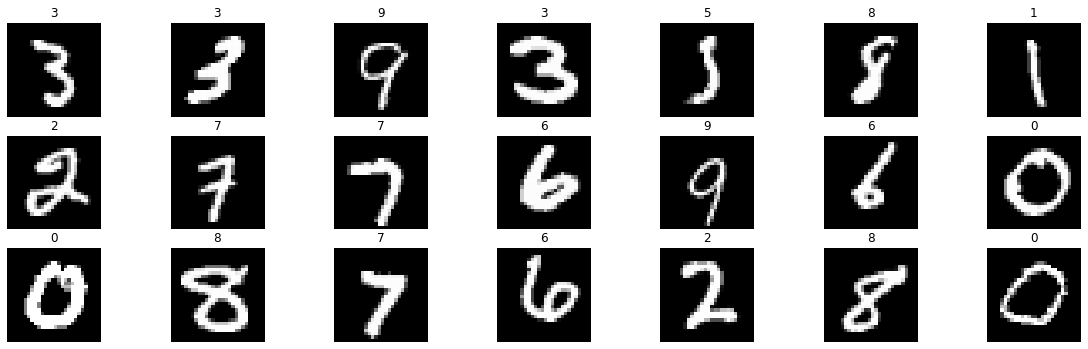

In [162]:
images, labels = next(iter(train_loader))
plt.figure(figsize=(20,10))

for i in range(21):
    plt.subplot(5,7,i+1)
    plt.imshow(images[i].numpy()[0], 'gray')
    plt.title(labels[i].item())
    plt.axis('off')

You shouild implement a fully-connected network to classify the digits. It should contain 1 hidden layer with 100 units. Don't forget the ReLU activation function after the hidden layer. 

In [0]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.fully_connected1 = nn.Sequential(
            nn.Linear(784,1024),
            nn.ReLU()
            )
        
        self.fully_connected2 = nn.Sequential(
            nn.Linear(1024,1024),
            nn.ReLU()
            )
        
        self.fully_connected3 = nn.Sequential(
            nn.Linear(1024,10),
            nn.Softmax(dim = 1)
            )
        
    def forward(self, x):
      #reshaping x so it becomes flat, except for the first dimension (which is the minibatch)
        x = x.view(x.size(0),-1)
        x = self.fully_connected1(x)
        x = self.fully_connected2(x)
        x = self.fully_connected3(x)
        return x

We instantiate a copy of our network and transfer it to the GPU if it's available

In [0]:
model = Network()
model.to(device)
#Initialize the optimer
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

We train the network for five epochs

In [165]:
num_epochs = 5

for epoch in tqdm(range(num_epochs), unit='epoch'):
    #For each epoch
    train_correct = 0
    for minibatch_no, (data, target) in tqdm(enumerate(train_loader), total=len(train_loader)):
        data, target = data.to(device), target.to(device)
        #Zero the gradients computed for each weight
        optimizer.zero_grad()
        #Forward pass your image through the network
        output = model(data)
        #Compute the loss
        loss = F.nll_loss(torch.log(output), target)
        #Backward pass through the network
        loss.backward()
        #Update the weights
        optimizer.step()
        
        #Compute how many were correctly classified
        predicted = output.argmax(1)
        train_correct += (target==predicted).sum().cpu().item()
    #Comput the test accuracy
    test_correct = 0
    for data, target in test_loader:
        data = data.to(device)
        with torch.no_grad():
            output = model(data)
        predicted = output.argmax(1).cpu()
        test_correct += (target==predicted).sum().item()
    train_acc = train_correct/len(trainset)
    test_acc = test_correct/len(testset)
    print("Accuracy train: {train:.1f}%\t test: {test:.1f}%".format(test=100*test_acc, train=100*train_acc))


Accuracy train: 88.1%	 test: 94.2%



Accuracy train: 95.2%	 test: 96.1%



Accuracy train: 96.8%	 test: 96.8%



Accuracy train: 97.6%	 test: 95.6%



Accuracy train: 98.2%	 test: 97.7%



Displaying of miscalssified examples. Systematical errors

In [0]:
    num_of_wrong_examples = 9
    wrong_examples = []
    for images, labels in test_loader:
          data = images.to(device)
          with torch.no_grad():
              output = model(data)
          predicted_labels = output.argmax(1).cpu()
          diff_labels = labels - predicted_labels
          wrong_indices = [i for i, diff_label in enumerate(diff_labels) if diff_label != 0]
          [wrong_examples.append({"img": images[i],"label": labels[i], "predicted_label": output[i].cpu()}) for i in wrong_indices]
          if len(wrong_examples) >= num_of_wrong_examples:
            break
    

In [ ]:
    plt.figure(figsize=(20,10))
    print(wrong_examples[0]["predicted_label"].numpy())
    for i in range(num_of_wrong_examples):
      plt.subplot(3,3,i+1)
      #plt.imshow(wrong_examples[i]["img"].numpy()[0], 'gray')
      plt.bar(range(10), wrong_examples[i]["predicted_label"].numpy())
      plt.title(wrong_examples[i]["label"].item())
      #plt.axis('off')

[1.3505817e-04 2.0595640e-04 1.8283584e-04 7.1648043e-05 3.8315603e-01
 1.7343169e-04 1.8645452e-03 8.4451906e-04 8.3260232e-04 6.1253327e-01]


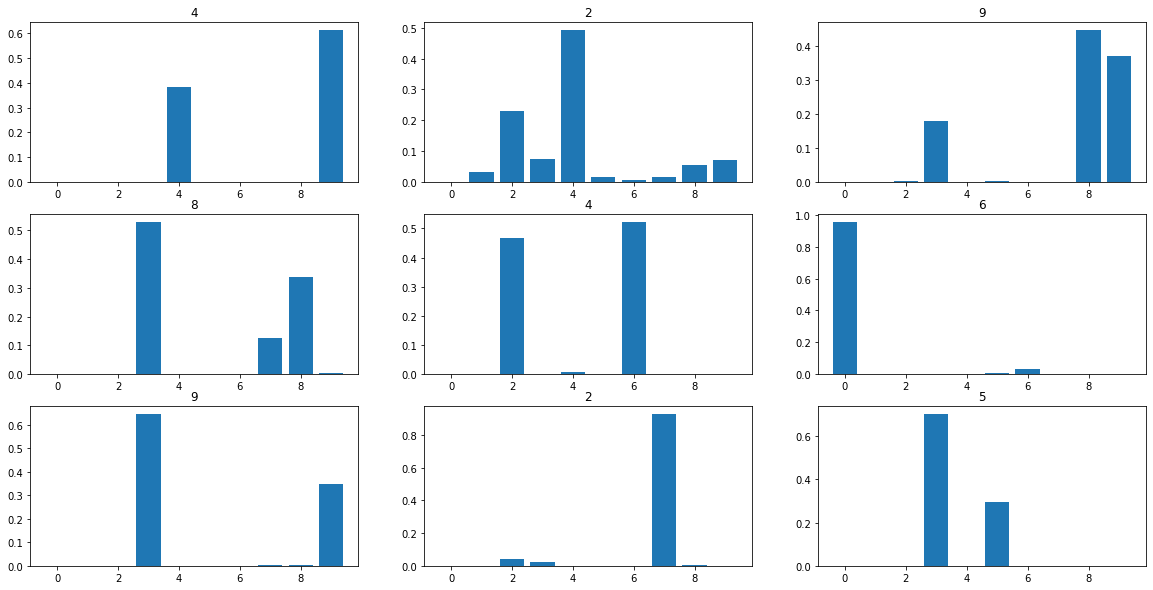

In [167]:
You should now have a model that has about 96% accuracy on the test set.
Try to get an even better accuracy. You can
* Change the number of hidden layers
* Change the number of units in the hidden layers
* Try using sigmoid instead of ReLU activation
* Try changing the learning rate

How large accuracy can you get?

Try showing the classification output (probabilities) from the model alongside the ground truth.

* Which are classified correctly/incorrectly? 
* If it's incorrect, what is the second most likely class?
* Does the misclassification use sense?

You should now have a model that has about 96% accuracy on the test set.
Try to get an even better accuracy. You can
* Change the number of hidden layers
* Change the number of units in the hidden layers
* Try using sigmoid instead of ReLU activation
* Try changing the learning rate

How large accuracy can you get?

Try showing the classification output (probabilities) from the model alongside the ground truth.

* Which are classified correctly/incorrectly? 
* If it's incorrect, what is the second most likely class?
* Does the misclassification use sense?